### Mask-RCNN DataLoader. Common objects in context COCO dataset

In [1]:
import os
import matplotlib.pyplot as plt
os.chdir('..')

from samples.plates import plates
from preprocess import preprocess
from preprocess import augmentation as aug

%matplotlib inline

In [2]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2021-08-06T22:40:57.359179-03:00

Python implementation: CPython
Python version       : 3.7.5
IPython version      : 7.23.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

matplotlib: 3.1.1
sys       : 3.7.5 (tags/v3.7.5:5c02a39a0b, Oct 15 2019, 00:11:34) [MSC v.1916 64 bit (AMD64)]



In [3]:
base_dir = r'D:\Data\cemex\patentes\maskrccnn dataset\maskrccnn dataset 500'
train_dir = base_dir
val_dir = base_dir

In [4]:
from common.config import CONFIG

In [5]:
CONFIG.update(plates.COCO_CONFIG)
CONFIG

{'image_shape': (512, 512, 3),
 'img_size': 512,
 'backbone': 'mobilenet',
 'meta_shape': 14,
 'num_classes': 2,
 'class_dict': {'background': 0, 'plate': 1},
 'normalization': None,
 'image_min_dim': 300,
 'image_min_scale': 0,
 'image_max_dim': 512,
 'image_resize_mode': 'square',
 'use_mini_masks': False,
 'mini_mask_shape': (32, 32),
 'mask_shape': (28, 28),
 'epochs': 100,
 'gpu_num': 1,
 'batch_size': 1,
 'images_per_gpu': 1,
 'training': True,
 'log_per_steps': 5,
 'use_multiprocessing': True,
 'workers': 6,
 'callback': {'log_dir': 'logs\\scalars',
  'reduce_lr_on_plateau': 0.98,
  'reduce_lr_on_plateau_patience': 10,
  'save_weights_only': True,
  'save_best_only': True,
  'histogram_freq': 0,
  'profile_batch': '1,2'},
 'backbone_strides': [4, 8, 16, 32, 64],
 'top_down_pyramid_size': 256,
 'rpn_anchor_scales': (32, 64, 128, 256, 512),
 'rpn_anchor_ratios': [0.5, 1, 2],
 'rpn_anchor_stride': 1,
 'rpn_train_anchors_per_image': 256,
 'max_gt_instances': 100,
 'rpn_bbox_std_dev'

In [7]:
train_dataset = plates.PlateDataset(dataset_dir=train_dir,
                                 subset='train',                             
                                 # SegmentationDataset necessary parent attributes
                                 augmentation=aug.get_training_augmentation(
                                               image_size=CONFIG['img_size'],
                                               normalize=CONFIG['normalization']
                                 ),
                                 **CONFIG
                                )

val_dataset = plates.PlateDataset(dataset_dir=val_dir,
                               subset='valid',
                               # SegmentationDataset necessary parent attributes
                               augmentation=aug.get_validation_augmentation(
                                           image_size=CONFIG['img_size'],
                                           normalize=CONFIG['normalization']
                               ),
                               **CONFIG
                              )

train_dataloader = preprocess.DataLoader(train_dataset,
                                         shuffle=True,
                                         name='train',
                                         **CONFIG
                                        )
val_dataloader = preprocess.DataLoader(val_dataset,
                                       shuffle=False,
                                       name='val',
                                       **CONFIG
                                      )

C:\Users\manuel.alfonso\AppData\Roaming\Python\Python37\site-packages\albumentations\imgaug\transforms.py:122: FutureWarning: IAAFliplr is deprecated. Please use HorizontalFlip instead.
  warnings.warn("IAAFliplr is deprecated. Please use HorizontalFlip instead.", FutureWarning)
C:\Users\manuel.alfonso\AppData\Roaming\Python\Python37\site-packages\albumentations\imgaug\transforms.py:137: FutureWarning: IAAFlipud is deprecated. Please use VerticalFlip instead.
  warnings.warn("IAAFlipud is deprecated. Please use VerticalFlip instead.", FutureWarning)
C:\Users\manuel.alfonso\AppData\Roaming\Python\Python37\site-packages\albumentations\augmentations\transforms.py:1897: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  "blur_limit and sigma_limit minimum value can not be both equal to 0. "
C:\Users\manuel.alfonso\AppData\Roaming\Python\Python37\site-packages\albumentations\imgaug\transforms.py:252: FutureWarning: IAAA

None passed to images_dir argument.
 This means that the dataset class is a child of SegmentationDataset and itsbehaviour differs from datasets created with VGG Image Annotator.
 If it is not true, please, check your class arguments carefully.

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
None passed to images_dir argument.
 This means that the dataset class is a child of SegmentationDataset and itsbehaviour differs from datasets created with VGG Image Annotator.
 If it is not true, please, check your class arguments carefully.

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
train DataLoader. Steps per epoch: 378
val DataLoader. Steps per epoch: 75


Create data generators for training and validation

In [8]:
train_iterated = iter(train_dataloader)
val_iterated = iter(val_dataloader)

In [9]:
train_batch = next(train_iterated)

In [10]:
for x in train_batch[0]:
    print(x.shape)

(1, 512, 512, 3)
(1, 14)
(1, 65472, 1)
(1, 256, 4)
(1, 100)
(1, 100, 4)
(1, 512, 512, 100)


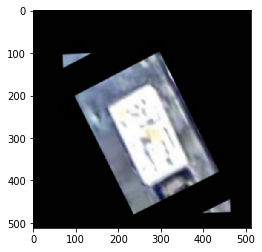

In [11]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(train_batch[0][0][i])

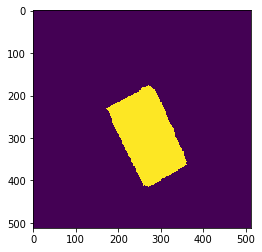

In [12]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(train_batch[0][6][i][:, :, 0])

In [13]:
val_batch = next(val_iterated)

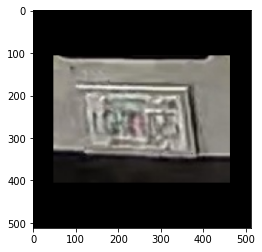

In [14]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(val_batch[0][0][i])

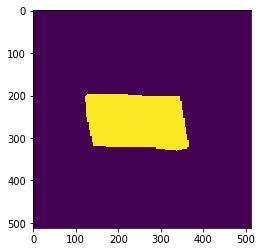

In [15]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(val_batch[0][6][i][:, :, 0])